In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_excel('data.xlsx')

In [3]:
data.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Price range,Aggregate rating,Rating color,Rating text,Votes
0,7402935,Skye,94,Jakarta,"Menara BCA, Lantai 56, Jl. MH. Thamrin, Thamri...","Grand Indonesia Mall, Thamrin","Grand Indonesia Mall, Thamrin, Jakarta",106.821999,-6.196778,"Italian, Continental",800000,Indonesian Rupiah(IDR),No,No,3,4.1,Green,Very Good,1498
1,7410290,Satoo - Hotel Shangri-La,94,Jakarta,"Hotel Shangri-La, Jl. Jend. Sudirman","Hotel Shangri-La, Sudirman","Hotel Shangri-La, Sudirman, Jakarta",106.818961,-6.203292,"Asian, Indonesian, Western",800000,Indonesian Rupiah(IDR),No,No,3,4.6,Dark Green,Excellent,873
2,7420899,Sushi Masa,94,Jakarta,"Jl. Tuna Raya No. 5, Penjaringan",Penjaringan,"Penjaringan, Jakarta",106.800144,-6.101298,"Sushi, Japanese",500000,Indonesian Rupiah(IDR),No,No,3,4.9,Dark Green,Excellent,605
3,7421967,3 Wise Monkeys,94,Jakarta,"Jl. Suryo No. 26, Senopati, Jakarta",Senopati,"Senopati, Jakarta",106.813400,-6.235241,Japanese,450000,Indonesian Rupiah(IDR),No,No,3,4.2,Green,Very Good,395
4,7422489,Avec Moi Restaurant and Bar,94,Jakarta,"Gedung PIC, Jl. Teluk Betung 43, Thamrin, Jakarta",Thamrin,"Thamrin, Jakarta",106.821023,-6.196270,"French, Western",350000,Indonesian Rupiah(IDR),No,No,3,4.3,Green,Very Good,243


In [6]:
cc = pd.read_excel('Country-Code.xlsx')
df= pd.merge(data,cc,on='Country Code',how='left')
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,7402935,Skye,94,Jakarta,"Menara BCA, Lantai 56, Jl. MH. Thamrin, Thamri...","Grand Indonesia Mall, Thamrin","Grand Indonesia Mall, Thamrin, Jakarta",106.821999,-6.196778,"Italian, Continental",800000,Indonesian Rupiah(IDR),No,No,3,4.1,Green,Very Good,1498,Indonesia
1,7410290,Satoo - Hotel Shangri-La,94,Jakarta,"Hotel Shangri-La, Jl. Jend. Sudirman","Hotel Shangri-La, Sudirman","Hotel Shangri-La, Sudirman, Jakarta",106.818961,-6.203292,"Asian, Indonesian, Western",800000,Indonesian Rupiah(IDR),No,No,3,4.6,Dark Green,Excellent,873,Indonesia
2,7420899,Sushi Masa,94,Jakarta,"Jl. Tuna Raya No. 5, Penjaringan",Penjaringan,"Penjaringan, Jakarta",106.800144,-6.101298,"Sushi, Japanese",500000,Indonesian Rupiah(IDR),No,No,3,4.9,Dark Green,Excellent,605,Indonesia
3,7421967,3 Wise Monkeys,94,Jakarta,"Jl. Suryo No. 26, Senopati, Jakarta",Senopati,"Senopati, Jakarta",106.813400,-6.235241,Japanese,450000,Indonesian Rupiah(IDR),No,No,3,4.2,Green,Very Good,395,Indonesia
4,7422489,Avec Moi Restaurant and Bar,94,Jakarta,"Gedung PIC, Jl. Teluk Betung 43, Thamrin, Jakarta",Thamrin,"Thamrin, Jakarta",106.821023,-6.196270,"French, Western",350000,Indonesian Rupiah(IDR),No,No,3,4.3,Green,Very Good,243,Indonesia


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9551 entries, 0 to 9550
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9550 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Price range           9551 non-null   int64  
 15  Aggregate rating     

In [9]:
# To check if data has duplicates
df.duplicated().sum()

0

In [10]:
# To check the Null count by columns
df.isnull().sum()

Restaurant ID           0
Restaurant Name         1
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
Country                 0
dtype: int64

In [13]:
# To drop the null values in Restaurant Column
df['Restaurant Name'].dropna(inplace=True)

In [14]:
# To replace null values with "others" in Cuisines Column
df['Cuisines'].fillna("Others",inplace=True)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9551 entries, 0 to 9550
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9550 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9551 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Price range           9551 non-null   int64  
 15  Aggregate rating     

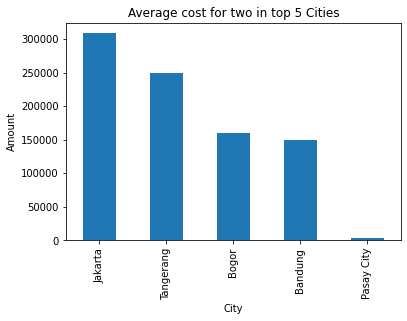

In [16]:
# Group by City and Calculate average cost for two and plot a bar graph for top 5
df.groupby("City")["Average Cost for two"].mean().sort_values(ascending=False).head().plot(kind='bar')
plt.title("Average cost for two in top 5 Cities")
plt.ylabel("Amount")
plt.show()

In [17]:
#Cuisines having High votes
df1=df.groupby("Cuisines")["Votes"].sum().reset_index()
df1

,Cuisines,Votes
0,Afghani,39
1,"Afghani, Mughlai, Chinese",2
2,"Afghani, North Indian",0
3,"Afghani, North Indian, Pakistani, Arabian",3
4,African,373
...,...,...
1821,"Western, Asian, Cafe",259
1822,"Western, Fusion, Fast Food",32
1823,World Cuisine,95
1824,"World Cuisine, Mexican, Italian",115


In [23]:
df1[df1["Votes"] != 0]

,Cuisines,Votes
0,Afghani,39
1,"Afghani, Mughlai, Chinese",2
3,"Afghani, North Indian, Pakistani, Arabian",3
4,African,373
5,"African, Portuguese",265
...,...,...
1821,"Western, Asian, Cafe",259
1822,"Western, Fusion, Fast Food",32
1823,World Cuisine,95
1824,"World Cuisine, Mexican, Italian",115


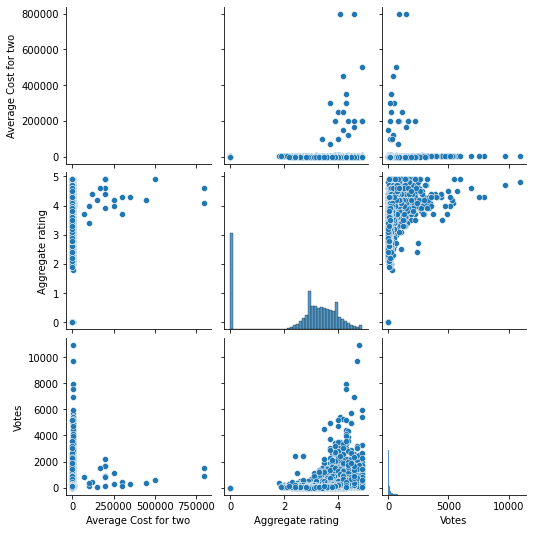

In [25]:
# Comparision between Average cost of two, Aggregate rating and Votes
sns.pairplot(df[["Average Cost for two","Aggregate rating","Votes"]])

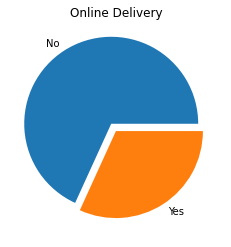

In [62]:
# To check number of restaurants with Online Delivery
df["Has Online delivery"].value_counts().plot(kind="pie",explode=(0.1,0))
plt.title("Online Delivery")
plt.ylabel("")
plt.show()

In [27]:
# To check for Rating Counts
df["Rating text"].value_counts()

Average      3737
Not rated    2148
Good         2100
Very Good    1079
Excellent     301
Poor          186
Name: Rating text, dtype: int64

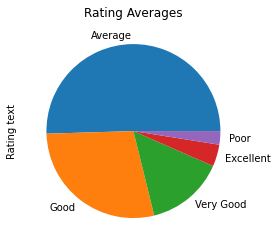

In [28]:
# To filter out not rated ones
df=df[df["Rating text"] != "Not rated"]
df["Rating text"].value_counts().plot(kind="pie")
plt.title("Rating Averages")
plt.show()

In [53]:
#Explore the geographical distribution of the restaurants.
dist = df.groupby(['Country Code','Country']).agg( Count = ('Restaurant ID','count'))
dist.sort_values(by='Count',ascending=False)
#We observe that India has then highest number of restaurants with 8651 restaurants and USA is number 2 with 434 restaurants


,,Count
Country Code,Country,
1,India,6513
216,United States,431
215,United Kingdom,79
189,South Africa,60
214,UAE,60
30,Brazil,55
148,New Zealand,40
208,Turkey,34
14,Australia,24


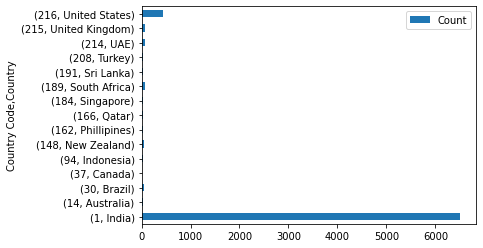

In [55]:
dist.plot(kind='barh')
plt.show()

In [56]:
#Finding out the cities with maximum / minimum number of restaurants
city = df.groupby(['Country','City']).agg(Count = ('Restaurant ID','count'))
city.describe()
#city with max restaurant has count = 4048
#city with min restaurant has count = 1

,Count
count,141.000000
mean,52.503546
std,351.806697
min,1.000000
25%,1.000000
50%,20.000000
75%,20.000000
max,4048.000000


In [57]:
city.sort_values(by='Count',ascending=False)
# we see that new Delhi has the maximum restaurant with 5473
# we observe that multiple cities have only one restaurant.

Count
Country       City                 
India         New Delhi        4048
              Gurgaon           890
              Noida             696
              Faridabad         151
              Ghaziabad          23
...                             ...
              Panchkula           1
Australia     Balingup            1
Indonesia     Bandung             1
Phillipines   Quezon City         1
United States Winchester Bay      1

[141 rows x 1 columns]

In [58]:
min_cnt = city[city['Count']==1]
min_cnt.info()
min_cnt
#There are 46 cities in 7 different countries with 1 restaurants

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 46 entries, ('Australia', 'Armidale') to ('United States', 'Winchester Bay')
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Count   46 non-null     int64
dtypes: int64(1)
memory usage: 1.8+ KB


Count
Country       City                   
Australia     Armidale              1
              Balingup              1
              Beechworth            1
              Dicky Beach           1
              East Ballina          1
              Flaxton               1
              Forrest               1
              Huskisson             1
              Inverloch             1
              Lakes Entrance        1
              Lorn                  1
              Macedon               1
              Mayfield              1
              Middleton Beach       1
              Montville             1
              Palm Cove             1
              Paynesville           1
              Penola                1
              Phillip Island        1
              Tanunda               1
              Trentham East         1
              Victor Harbor         1
Canada        Chatham-Kent          1
              Consort               1
              Vineland Station      1
              Yorkton               1
India         Mohali                1
              Panchkula             1
Indonesia     Bandung               1
Phillipines   Quezon City           1
              Tagaytay City         1
South Africa  Randburg              1
United States Clatskanie            1
              Cochrane              1
              Fernley               1
              Lakeview              1
              Lincoln               1
              Mc Millan             1
              Miller                1
              Monroe                1
              Ojo Caliente          1
              Potrero               1
              Princeton             1
              Vernonia              1
              Weirton               1
              Winchester Bay        1

In [60]:
#Explore the franchise with most national presence
franch = df.groupby(['Restaurant Name','Country']).agg(Count = ('Country','count'))
franch.sort_values(by='Count',ascending=False)
#Dominoes Pizza has most national prsesence

,,Count
Restaurant Name,Country,
Domino's Pizza,India,74
Cafe Coffee Day,India,67
Subway,India,61
McDonald's,India,47
Green Chick Chop,India,44
...,...,...
Giuseppe's Pizza & Italian Specialities,United States,1
Giulios Greek & Italian Restaurant,United States,1
Giri Momos Centre & Chinese Fast Food,India,1


In [65]:
df1=df.copy()

In [66]:
dummy = ['Has Table booking','Has Online delivery']
df1 = pd.get_dummies(df1,columns=dummy,drop_first=True)
df1.head()
# 0 indicates 'NO'
# 1 indicates 'YES'

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Price range,Aggregate rating,Rating color,Rating text,Votes,Country,Has Table booking_Yes,Has Online delivery_Yes
0,7402935,Skye,94,Jakarta,"Menara BCA, Lantai 56, Jl. MH. Thamrin, Thamri...","Grand Indonesia Mall, Thamrin","Grand Indonesia Mall, Thamrin, Jakarta",106.821999,-6.196778,"Italian, Continental",800000,Indonesian Rupiah(IDR),3,4.1,Green,Very Good,1498,Indonesia,0,0
1,7410290,Satoo - Hotel Shangri-La,94,Jakarta,"Hotel Shangri-La, Jl. Jend. Sudirman","Hotel Shangri-La, Sudirman","Hotel Shangri-La, Sudirman, Jakarta",106.818961,-6.203292,"Asian, Indonesian, Western",800000,Indonesian Rupiah(IDR),3,4.6,Dark Green,Excellent,873,Indonesia,0,0
2,7420899,Sushi Masa,94,Jakarta,"Jl. Tuna Raya No. 5, Penjaringan",Penjaringan,"Penjaringan, Jakarta",106.800144,-6.101298,"Sushi, Japanese",500000,Indonesian Rupiah(IDR),3,4.9,Dark Green,Excellent,605,Indonesia,0,0
3,7421967,3 Wise Monkeys,94,Jakarta,"Jl. Suryo No. 26, Senopati, Jakarta",Senopati,"Senopati, Jakarta",106.813400,-6.235241,Japanese,450000,Indonesian Rupiah(IDR),3,4.2,Green,Very Good,395,Indonesia,0,0
4,7422489,Avec Moi Restaurant and Bar,94,Jakarta,"Gedung PIC, Jl. Teluk Betung 43, Thamrin, Jakarta",Thamrin,"Thamrin, Jakarta",106.821023,-6.196270,"French, Western",350000,Indonesian Rupiah(IDR),3,4.3,Green,Very Good,243,Indonesia,0,0


In [68]:
#Ration between restaurants allowing table booking and those which dont
table_booking = df1[df1['Has Table booking_Yes']==1]['Restaurant ID'].count()
table_nbooking =df1[df1['Has Table booking_Yes']==0]['Restaurant ID'].count()
print('Ratio between restaurants that allow table booking vs. those that do not allow table booking: ',
      round((table_booking/table_nbooking),2))

Ratio between restaurants that allow table booking vs. those that do not allow table booking:  0.18


In [69]:
#Percentage of restaurant that has online delivery
od = df1[df1['Has Online delivery_Yes'] == 1]['Restaurant ID'].count()
nod = df1[df1['Has Online delivery_Yes'] == 0]['Restaurant ID'].count()
print('Percentage of restaurants providing online delivery : {} %'.format((round(od/len(df1),3)*100)))

Percentage of restaurants providing online delivery : 31.8 %


In [70]:
rest_deliver = df1[df1['Has Table booking_Yes'] == 1]['Votes'].sum()
rest_ndeliver = df1[df1['Has Table booking_Yes'] == 0]['Votes'].sum()
print('Difference in number of votes for restaurants that deliver and dont deliver: ',abs((rest_deliver - rest_ndeliver)))

Difference in number of votes for restaurants that deliver and dont deliver:  679072


In [77]:
max_rate = df1.sort_values(by='Aggregate rating',ascending=False).groupby(['Country','City'],as_index=False).first()
#highest rating restaurants

min_rate = df1.sort_values(by='Aggregate rating',ascending=False).groupby(['Country','City'],as_index=False).last()
#lowest rating restaurants

df_max=max_rate[['Country','City','Restaurant Name','Aggregate rating']] #new dataframe created for high rated restaurants

df_min=min_rate[['Country','City','Restaurant Name','Aggregate rating']] #new dataframe created for low rated restaurants

rating_rest=df_max.merge(df_min,left_on='City',right_on='City',how='inner') #merge into single dataframe

rating_rest.drop(columns='Country_y',axis=1,inplace=True)
rating_rest.columns = ['Country','City','Highest Rated Restaurant','Rating Max','Lowest Rated Restaurant','Rating Min']
rating_rest

,Country,City,Highest Rated Restaurant,Rating Max,Lowest Rated Restaurant,Rating Min
0,Australia,Armidale,Whitebull Hotel,3.5,Whitebull Hotel,3.5
1,Australia,Balingup,Taste of Balingup,3.2,Taste of Balingup,3.2
2,Australia,Beechworth,Bridge Road Brewers,4.6,Bridge Road Brewers,4.6
3,Australia,Dicky Beach,The Giggling Goat,3.6,The Giggling Goat,3.6
4,Australia,East Ballina,The Belle General,4.1,The Belle General,4.1
...,...,...,...,...,...,...
136,United States,Valdosta,Smok'n Pig B-B-Q,4.1,El Toreo Mexican Restaurant,3.1
137,United States,Vernonia,Blue House Cafe,4.3,Blue House Cafe,4.3
138,United States,Waterloo,Tokyo Japanese Steak House,3.9,Masala Grill & Coffee House,3.2
139,United States,Weirton,Theo Yianni's Authentic Greek Restaurant,3.9,Theo Yianni's Authentic Greek Restaurant,3.9


In [78]:
#To identify top 10 cuisines served across
cuisines = df1['Cuisines'].apply(lambda x: pd.Series(x.split(',')))
cuisines.columns = ['Cuisine_1','Cuisine_2','Cuisine_3','Cuisine_4','Cuisine_5','Cuisine_6','Cuisine_7','Cuisine_8']
cuisines.tail()

,Cuisine_1,Cuisine_2,Cuisine_3,Cuisine_4,Cuisine_5,Cuisine_6,Cuisine_7,Cuisine_8
9546,Chinese,North Indian,Fast Food,NaN,NaN,NaN,NaN,NaN
9547,Indian,Chinese,Continental,NaN,NaN,NaN,NaN,NaN
9548,Cafe,Continental,Desserts,Ice Cream,Italian,Beverages,NaN,NaN
9549,Street Food,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9550,Chinese,North Indian,NaN,NaN,NaN,NaN,NaN,NaN


In [79]:
df_cuisines = pd.concat([df1,cuisines],axis=1)
df_cuisines.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking_Yes,Has Online delivery_Yes,Cuisine_1,Cuisine_2,Cuisine_3,Cuisine_4,Cuisine_5,Cuisine_6,Cuisine_7,Cuisine_8
0,7402935,Skye,94,Jakarta,"Menara BCA, Lantai 56, Jl. MH. Thamrin, Thamri...","Grand Indonesia Mall, Thamrin","Grand Indonesia Mall, Thamrin, Jakarta",106.821999,-6.196778,"Italian, Continental",...,0,0,Italian,Continental,NaN,NaN,NaN,NaN,NaN,NaN
1,7410290,Satoo - Hotel Shangri-La,94,Jakarta,"Hotel Shangri-La, Jl. Jend. Sudirman","Hotel Shangri-La, Sudirman","Hotel Shangri-La, Sudirman, Jakarta",106.818961,-6.203292,"Asian, Indonesian, Western",...,0,0,Asian,Indonesian,Western,NaN,NaN,NaN,NaN,NaN
2,7420899,Sushi Masa,94,Jakarta,"Jl. Tuna Raya No. 5, Penjaringan",Penjaringan,"Penjaringan, Jakarta",106.800144,-6.101298,"Sushi, Japanese",...,0,0,Sushi,Japanese,NaN,NaN,NaN,NaN,NaN,NaN
3,7421967,3 Wise Monkeys,94,Jakarta,"Jl. Suryo No. 26, Senopati, Jakarta",Senopati,"Senopati, Jakarta",106.813400,-6.235241,Japanese,...,0,0,Japanese,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,7422489,Avec Moi Restaurant and Bar,94,Jakarta,"Gedung PIC, Jl. Teluk Betung 43, Thamrin, Jakarta",Thamrin,"Thamrin, Jakarta",106.821023,-6.196270,"French, Western",...,0,0,French,Western,NaN,NaN,NaN,NaN,NaN,NaN


In [82]:
cuisine_loc = pd.DataFrame(df_cuisines[['Country','City','Locality Verbose','Cuisine_1','Cuisine_2','Cuisine_3','Cuisine_4','Cuisine_5','Cuisine_6','Cuisine_7','Cuisine_8']])
cuisine_loc_stack=pd.DataFrame(cuisine_loc.stack()) #stacking the columns 
cuisine_loc.head()

,Country,City,Locality Verbose,Cuisine_1,Cuisine_2,Cuisine_3,Cuisine_4,Cuisine_5,Cuisine_6,Cuisine_7,Cuisine_8
0,Indonesia,Jakarta,"Grand Indonesia Mall, Thamrin, Jakarta",Italian,Continental,NaN,NaN,NaN,NaN,NaN,NaN
1,Indonesia,Jakarta,"Hotel Shangri-La, Sudirman, Jakarta",Asian,Indonesian,Western,NaN,NaN,NaN,NaN,NaN
2,Indonesia,Jakarta,"Penjaringan, Jakarta",Sushi,Japanese,NaN,NaN,NaN,NaN,NaN,NaN
3,Indonesia,Jakarta,"Senopati, Jakarta",Japanese,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Indonesia,Jakarta,"Thamrin, Jakarta",French,Western,NaN,NaN,NaN,NaN,NaN,NaN


In [83]:
keys = [c for c in cuisine_loc  if c.startswith('Cuisine')]
a=pd.melt(cuisine_loc, id_vars='Locality Verbose', value_vars=keys, value_name='Cuisines') 
#melting the stack into one row
max_rate=pd.DataFrame(a.groupby(by=['Locality Verbose','variable','Cuisines']).size().reset_index())
#find the highest restuarant in the city
max_rate
del max_rate['variable']
max_rate.columns=['Locality Verbose','Cuisines','Count']
max_rate.head()

,Locality Verbose,Cuisines,Count
0,"ILD Trade Centre Mall, Sohna Road, Gurgaon",Cafe,1
1,"ILD Trade Centre Mall, Sohna Road, Gurgaon",North Indian,1
2,"ILD Trade Centre Mall, Sohna Road, Gurgaon",Beverages,1
3,"ILD Trade Centre Mall, Sohna Road, Gurgaon",Mughlai,1
4,"12th Square Building, Banjara Hills, Hyderabad",Mughlai,1


In [84]:
#find the highest restuarant in the city
loc=max_rate.sort_values('Count', ascending=False).groupby(by=['Locality Verbose'],as_index=False).first()
loc.head()


,Locality Verbose,Cuisines,Count
0,"ILD Trade Centre Mall, Sohna Road, Gurgaon",Cafe,1
1,"12th Square Building, Banjara Hills, Hyderabad",Chinese,1
2,"A Hotel, Gurdev Nagar, Ludhiana",Fast Food,1
3,"ARSS Mall, Paschim Vihar, New Delhi",Fast Food,1
4,"Abu Dhabi Mall, Tourist Club Area (Al Zahiyah...",American,2


In [87]:
rating_res=loc.merge(df1,left_on='Locality Verbose',right_on='Locality Verbose',how='inner') 
#inner join to merge the two dataframe
df=pd.DataFrame(rating_res[['Country','City','Locality Verbose','Cuisines_x','Count']]) 
#making a dataframe of rating restaurant
country=rating_res.sort_values('Count', ascending=False).groupby(by=['Country'],as_index=False).first()
#grouping the data by country code
con=pd.DataFrame(country[['Country','City','Locality','Cuisines_x','Count']])
con.columns=['Country','City','Locality','Cuisines','Number of restaurants in the country']
#renaming the columns
con1=con.sort_values('Number of restaurants in the country', ascending=False) 
#sorting the restaurants on the basis of the number of restaurants in the country
con1[:10]
finalcount=con1.drop(con1.index[[7,10]])
finalcount

,Country,City,Locality,Cuisines,Number of restaurants in the country
3,India,New Delhi,Connaught Place,North Indian,47
14,United States,Dubuque,Dubuque,American,9
5,New Zealand,Wellington City,Te Aro,Cafe,5
1,Brazil,Rio de Janeiro,Ipanema,Brazilian,3
6,Phillipines,Pasig City,Kapitolyo,Filipino,2
8,Singapore,Singapore,"Marina Centre, Downtown Core",Seafood,2
9,South Africa,Cape Town,Green Point,Grill,2
11,Turkey,Ankara,Gazi Osman PaÅÙa,World Cuisine,2
12,UAE,Sharjah,Al Mareija,Pakistani,2
0,Australia,Trentham East,Trentham East,Australian,1


In [89]:
rest_cuisine = pd.DataFrame(df_cuisines[['Restaurant Name','City','Cuisine_1','Cuisine_2','Cuisine_3','Cuisine_4',
                                         'Cuisine_5','Cuisine_6','Cuisine_7','Cuisine_8']])
rest_cuisine_stack=pd.DataFrame(rest_cuisine.stack()) #stacking the columns 
rest_cuisine.head()

,Restaurant Name,City,Cuisine_1,Cuisine_2,Cuisine_3,Cuisine_4,Cuisine_5,Cuisine_6,Cuisine_7,Cuisine_8
0,Skye,Jakarta,Italian,Continental,NaN,NaN,NaN,NaN,NaN,NaN
1,Satoo - Hotel Shangri-La,Jakarta,Asian,Indonesian,Western,NaN,NaN,NaN,NaN,NaN
2,Sushi Masa,Jakarta,Sushi,Japanese,NaN,NaN,NaN,NaN,NaN,NaN
3,3 Wise Monkeys,Jakarta,Japanese,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Avec Moi Restaurant and Bar,Jakarta,French,Western,NaN,NaN,NaN,NaN,NaN,NaN


In [90]:
keys1 = [c for c in rest_cuisine  if c.startswith('Cuisine')]
b=pd.melt(rest_cuisine, id_vars='Restaurant Name', value_vars=keys, value_name='Cuisines') 
#melting the stack into one row
max_rate1=pd.DataFrame(b.groupby(by=['Restaurant Name','variable','Cuisines']).size().reset_index()) 
#find the highest restuarant in the city
max_rate1
del max_rate1['variable']
max_rate1.columns=['Restaurant_Name','Cuisines','Count']
max_rate1.head(20)

,Restaurant_Name,Cuisines,Count
0,12212,Fast Food,1
1,#45,Cafe,1
2,#Dilliwaala6,North Indian,1
3,#OFF Campus,Cafe,1
4,#OFF Campus,Continental,1
5,#OFF Campus,Italian,1
6,#OFF Campus,Fast Food,1
7,#Urban CafÌ©,North Indian,1
8,#Urban CafÌ©,Chinese,1
9,#Urban CafÌ©,Italian,1


In [91]:
max_rate1.sort_values('Count',ascending=False)
#Dominoes Pizza has the max number of cuisines and The least number of cuisines in a resaurant is 1

,Restaurant_Name,Cuisines,Count
3690,Domino's Pizza,Pizza,74
3691,Domino's Pizza,Fast Food,73
1995,Cafe Coffee Day,Cafe,67
10493,Subway,Salad,61
10494,Subway,Healthy Food,61
...,...,...,...
4546,Gemelli Cucina Bar,Contemporary,1
4547,Gemelli Cucina Bar,Italian,1
4548,GenY Cuisines,Chinese,1
4549,GenY Cuisines,Mexican,1


In [96]:
rating = df1[['Restaurant ID','Restaurant Name','Country','City','Aggregate rating','Average Cost for two','Votes','Price range','Has Table booking_Yes','Has Online delivery_Yes']]
rating = rating.merge(max_rate1,left_on='Restaurant Name',right_on='Restaurant_Name',how='left')
rating

,Restaurant ID,Restaurant Name,Country,City,Aggregate rating,Average Cost for two,Votes,Price range,Has Table booking_Yes,Has Online delivery_Yes,Restaurant_Name,Cuisines,Count
0,7402935,Skye,Indonesia,Jakarta,4.1,800000,1498,3,0,0,Skye,Italian,1.0
1,7402935,Skye,Indonesia,Jakarta,4.1,800000,1498,3,0,0,Skye,Continental,1.0
2,7410290,Satoo - Hotel Shangri-La,Indonesia,Jakarta,4.6,800000,873,3,0,0,Satoo - Hotel Shangri-La,Asian,1.0
3,7410290,Satoo - Hotel Shangri-La,Indonesia,Jakarta,4.6,800000,873,3,0,0,Satoo - Hotel Shangri-La,Indonesian,1.0
4,7410290,Satoo - Hotel Shangri-La,Indonesia,Jakarta,4.6,800000,873,3,0,0,Satoo - Hotel Shangri-La,Western,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19275,18312106,UrbanCrave,India,Kanpur,3.9,0,127,1,0,0,UrbanCrave,Italian,1.0
19276,18312106,UrbanCrave,India,Kanpur,3.9,0,127,1,0,0,UrbanCrave,Beverages,1.0
19277,3900245,Deena Chat Bhandar,India,Varanasi,3.8,0,78,1,0,0,Deena Chat Bhandar,Street Food,1.0
19278,18246202,VNS Live Studio,India,Varanasi,3.5,0,109,1,0,0,VNS Live Studio,Chinese,1.0


,Count,Aggregate rating
Count,1.00000,-0.15956
Aggregate rating,-0.15956,1.00000


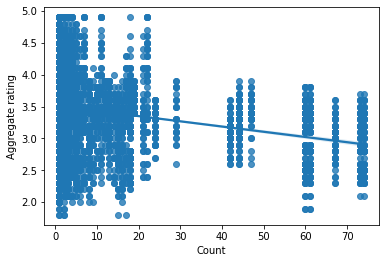

In [98]:
sns.regplot(x='Count',y='Aggregate rating',data=rating)
rating[["Count", "Aggregate rating"]].corr()
#Number of cuisines is not a good factor to decide the rating of a restaurant

,Average Cost for two,Aggregate rating
Average Cost for two,1.000000,0.071343
Aggregate rating,0.071343,1.000000


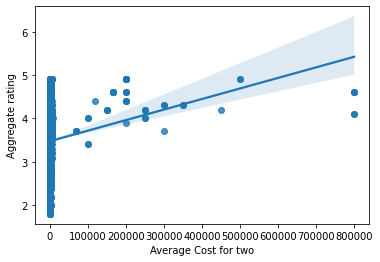

In [100]:
sns.regplot(x='Average Cost for two',y='Aggregate rating',data=rating)
rating[["Average Cost for two", "Aggregate rating"]].corr()
#Average cost for two is a weak positive factor to decide the rating of a restaurant

,Votes,Aggregate rating
Votes,1.000000,0.416755
Aggregate rating,0.416755,1.000000


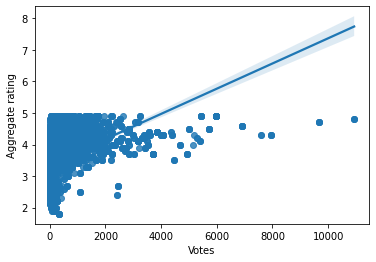

In [101]:
sns.regplot(x='Votes',y='Aggregate rating',data=rating)
rating[['Votes','Aggregate rating']].corr()
##Average cost for two can be a factor to decide the rating of a restaurant

,Price range,Aggregate rating
Price range,1.000000,0.430882
Aggregate rating,0.430882,1.000000


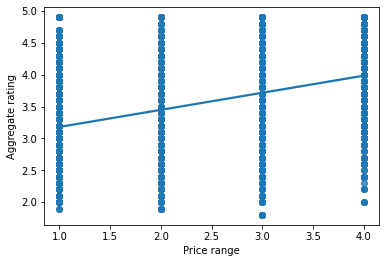

In [103]:
abc = df1[df1['Has Online delivery_Yes'] == 1]['Aggregate rating'].mean()
xyz = df1[df1['Has Online delivery_Yes'] == 0]['Aggregate rating'].mean()
sns.regplot(x='Price range',y='Aggregate rating',data=rating)
rating[['Price range','Aggregate rating']].corr()
##Price range can be a factor to decide the rating of a restaurant

,Has Table booking_Yes,Aggregate rating
Has Table booking_Yes,1.000000,0.101398
Aggregate rating,0.101398,1.000000


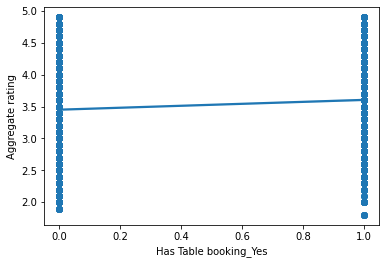

In [104]:
sns.regplot(x='Has Table booking_Yes',y='Aggregate rating',data=rating)
rating[['Has Table booking_Yes','Aggregate rating']].corr()
##Table booking can be a factor to decide the rating of a restaurant

In [39]:
x= pd.get_dummies(df[["Average Cost for two", "Has Table booking", "Has Online delivery", "Price range"]], drop_first=True)

In [40]:
y=df[["Aggregate rating"]]

In [41]:
x

,Average Cost for two,Price range,Has Table booking_Yes,Has Online delivery_Yes
0,800000,3,0,0
1,800000,3,0,0
2,500000,3,0,0
3,450000,3,0,0
4,350000,3,0,0
...,...,...,...,...
9546,0,1,0,0
9547,0,1,0,0
9548,0,1,0,0
9549,0,1,0,0


In [50]:
# Import Necessary libraries
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [51]:
# Standardize the features
scale = StandardScaler()
X_scaled = scale.fit_transform(x)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train the model
lr = LinearRegression()
lr.fit(X_train, y_train)

# Make predictions
y_pred = lr.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")


Mean Squared Error: 0.24463633969361387
Root Mean Squared Error: 0.49460725802763333
